In [28]:
# Name: Lilli Nappi
# CWID: 20006502
# DiabetesRF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Loading dataset
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# df.head()
# print(df.describe())
# #data preprocessing
df['Diabetes_binary'] = pd.Categorical(df['Diabetes_binary'])  # convert Class column to categorical data type
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [31]:
# Find column with at least one NaN
missing_values = df.isnull().any()
print(missing_values)

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool


In [32]:
# Create a new column for BMI

# 0 = Underweight (below 18)
# 1 = Healthy (19-24)
# 2 = Overweight (25-29)
# 3 = Obese (30-39)
# 4 = Extremely Obese (40+)

def categorize_bmi(bmi):
    if bmi < 18:
        return 0
    elif 18 <= bmi <= 24:
        return 1
    elif 25 <= bmi <= 29:
        return 2
    elif 30 <= bmi <= 39:
        return 3
    else:
        return 4

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)
df['BMI_Category'] = df['BMI_Category'].astype(float)
print(df[['BMI', 'BMI_Category']].head())


    BMI  BMI_Category
0  26.0           2.0
1  26.0           2.0
2  26.0           2.0
3  28.0           2.0
4  29.0           2.0


In [33]:
# Replace the BMI column with BMI_Category
df['BMI'] = df['BMI_Category']

df.drop(columns=['BMI_Category'], inplace=True)
print(df.head())


  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0             0.0     1.0       0.0        1.0  2.0     0.0     0.0   
1             0.0     1.0       1.0        1.0  2.0     1.0     1.0   
2             0.0     0.0       0.0        1.0  2.0     0.0     0.0   
3             0.0     1.0       1.0        1.0  2.0     1.0     0.0   
4             0.0     0.0       0.0        1.0  2.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   


In [34]:
df['Diabetes_binary'] = df['Diabetes_binary'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  object 
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [35]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                70692 non-null  float64
 1   HighChol              70692 non-null  float64
 2   CholCheck             70692 non-null  float64
 3   BMI                   70692 non-null  float64
 4   Smoker                70692 non-null  float64
 5   Stroke                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  AnyHealthcare         70692 non-null  float64
 12  NoDocbcCost           70692 non-null  float64
 13  GenHlth               70692 non-null  float64
 14  MentHlth              70692 non-null  float64
 15  PhysHlth           

Diabetes_binary_1.0
False    35346
True     35346
Name: count, dtype: int64


,Diabetes_binary_1.0
0,False
1,False
2,False
3,False
4,False


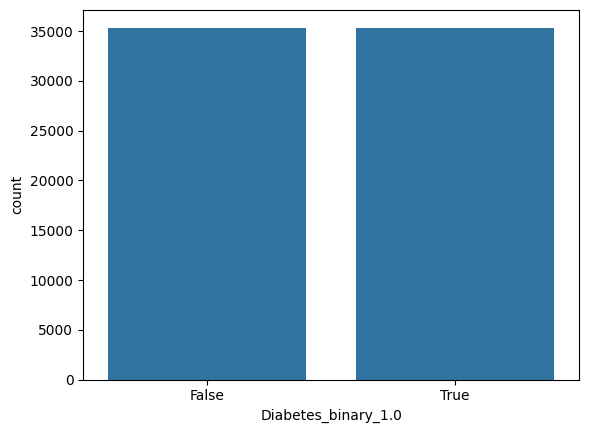

In [36]:
df_obj= pd.get_dummies(df_obj, drop_first=True)

print(df_obj['Diabetes_binary_1.0'].value_counts())
sns.countplot(data=df_obj, x='Diabetes_binary_1.0')
df_obj.head()

In [ ]:
attr = df_num
target = df_obj['Diabetes_binary_1.0']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=42)

In [38]:
#Use the Random Forest methodology to develop a classification model for the Diagnosis
model = RandomForestClassifier(n_estimators = 100, max_depth = 10)
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[7473 3128]
 [2085 8522]]
              precision    recall  f1-score   support

       False       0.78      0.70      0.74     10601
        True       0.73      0.80      0.77     10607

    accuracy                           0.75     21208
   macro avg       0.76      0.75      0.75     21208
weighted avg       0.76      0.75      0.75     21208



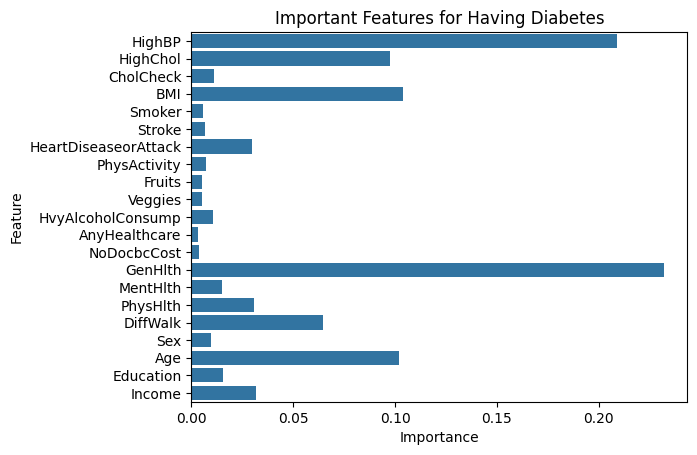

In [39]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': attr.columns, 'Importance': model.feature_importances_})

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Important Features for Having Diabetes')
plt.show()

In [40]:
# Display feature importances
feature_scores = pd.Series(model.feature_importances_, index=attr_train.columns).sort_values(ascending=False)
print("Having Diabetes")
print(feature_scores)
print("")

Having Diabetes
GenHlth                 0.231908
HighBP                  0.208880
BMI                     0.103834
Age                     0.101819
HighChol                0.097606
DiffWalk                0.064822
Income                  0.031558
PhysHlth                0.030695
HeartDiseaseorAttack    0.029638
Education               0.015673
MentHlth                0.014834
CholCheck               0.010887
HvyAlcoholConsump       0.010766
Sex                     0.009676
PhysActivity            0.007410
Stroke                  0.006772
Smoker                  0.005567
Fruits                  0.005131
Veggies                 0.005073
NoDocbcCost             0.003974
AnyHealthcare           0.003478
dtype: float64

